# Diabetes Classification

### This Model Can Classify That Wether  You Have Diabetes Or a Posibility To Have a Diabetes 

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import And Desplay The Data 

In [2]:
data = pd.read_csv('Diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(data['BMI'].min())
print(data['Glucose'].min())
print(data['BloodPressure'].min())

0.0
0
0


In [4]:
data.shape

(768, 9)

## Feature Engineering

### Find The Missing Values

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### There Are Some " 0 " Values In ( SkinThickness ) And ( SkinThickness ) That  Cant Be  0 

In [6]:
median = data['SkinThickness'].median()
median2 = data['Insulin'].median()
median3 = data['Glucose'].median()
median4 = data['BloodPressure'].median()
median5 = data['BMI'].median()
print(median)
print(median2)
print(median3)
print(median4)
print(median5)

23.0
30.5
117.0
72.0
32.0


### Replacing 0s Withe Medians

In [7]:
data['SkinThickness'] = np.where(data['SkinThickness']<10,median,data['SkinThickness'])    
data['Insulin'] = np.where(data['Insulin']==0,median,data['Insulin'])
data['Glucose'] = np.where(data['Glucose']==0,median,data['Glucose']) 
data['BloodPressure'] = np.where(data['BloodPressure']==0,median,data['BloodPressure']) 
data['BMI'] = np.where(data['BMI']==0.0,median,data['BMI']) 
data.head()      

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,23.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,23.0,26.6,0.351,31,0
2,8,183.0,64.0,23.0,23.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
print(data['BMI'].min())
print(data['Glucose'].min())
print(data['BloodPressure'].min())
print(data['SkinThickness'].min())
print(data['DiabetesPedigreeFunction'].min())
data.columns

18.2
23.0
23.0
10.0
0.078


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Feture Selection

### Correlation And Heat Map

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130110,0.167809,0.036327,-0.060448,0.020912,-0.033523,0.544341,0.221898
Glucose,0.130110,1.000000,0.181616,0.159223,0.352106,0.229669,0.138278,0.265969,0.474768
BloodPressure,0.167809,0.181616,1.000000,0.177597,0.063436,0.249256,0.033621,0.277507,0.094217
SkinThickness,0.036327,0.159223,0.177597,1.000000,0.251842,0.544662,0.155931,0.060720,0.189592
Insulin,-0.060448,0.352106,0.063436,0.251842,1.000000,0.196460,0.180077,-0.022461,0.143914
BMI,0.020912,0.229669,0.249256,0.544662,0.196460,1.000000,0.153657,0.029797,0.314657
DiabetesPedigreeFunction,-0.033523,0.138278,0.033621,0.155931,0.180077,0.153657,1.000000,0.033561,0.173844
Age,0.544341,0.265969,0.277507,0.060720,-0.022461,0.029797,0.033561,1.000000,0.238356
Outcome,0.221898,0.474768,0.094217,0.189592,0.143914,0.314657,0.173844,0.238356,1.000000


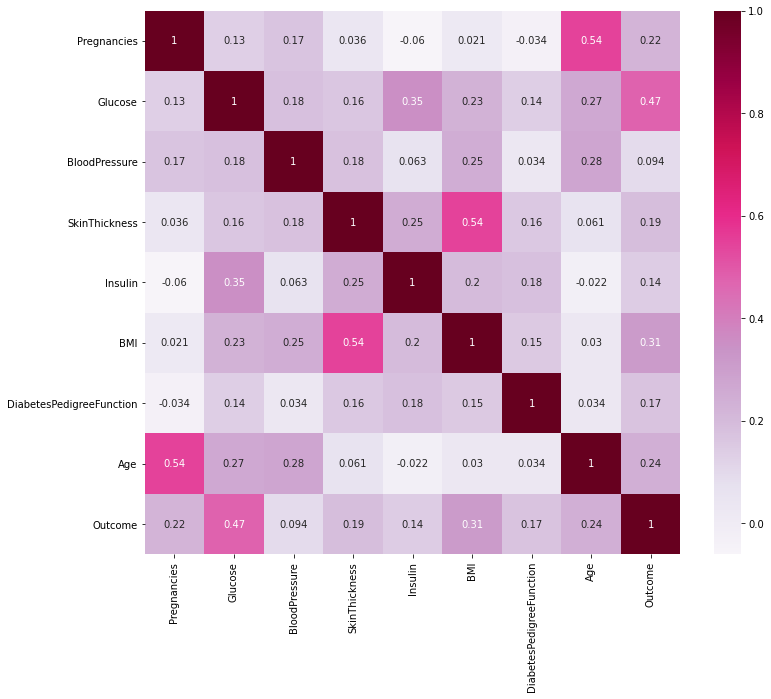

In [11]:
plt.figure(figsize = (12,10))
g = sns.heatmap(data.corr(),annot = True , cmap = "PuRd") 

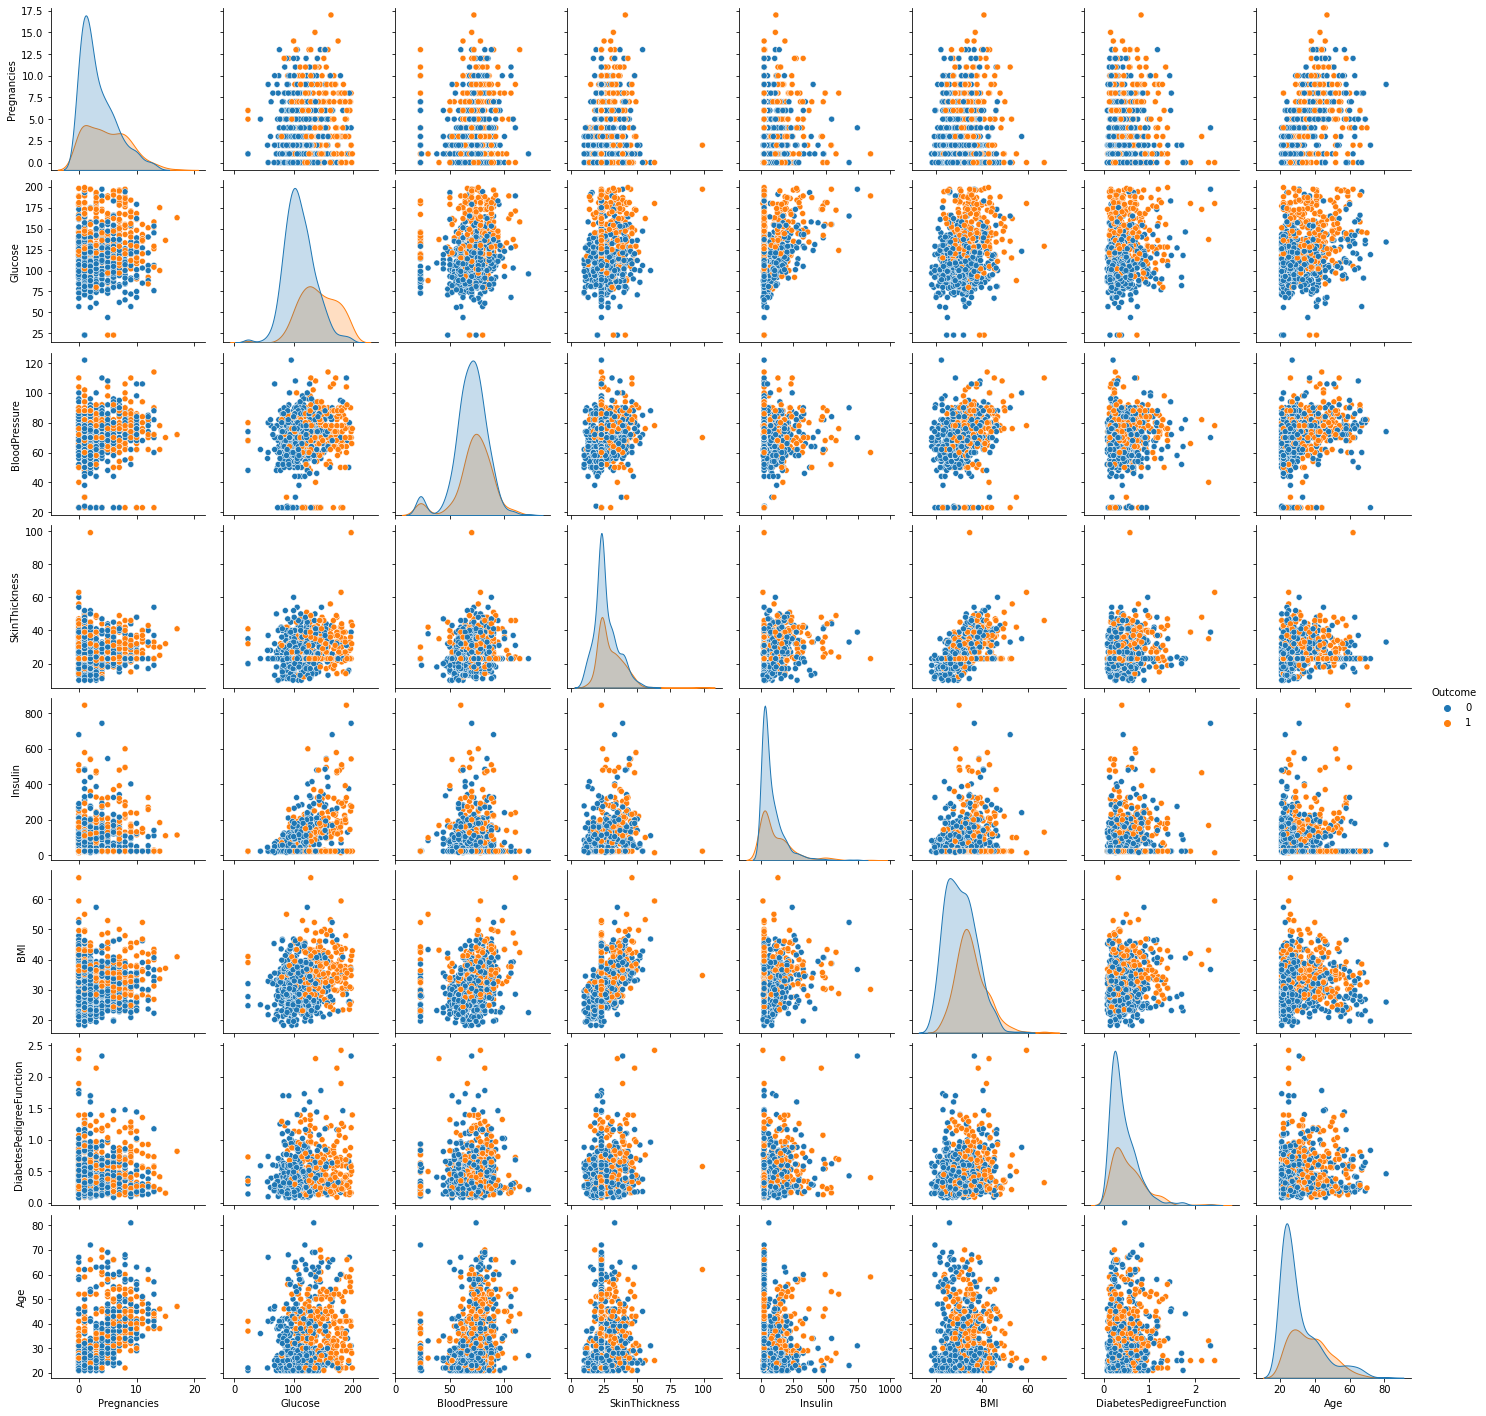

In [12]:
sns.pairplot(data,hue='Outcome')

# Splite The Data In Dependent And Independent

In [13]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,23.0,33.6,0.627,50
1,1,85.0,66.0,29.0,23.0,26.6,0.351,31
2,8,183.0,64.0,23.0,23.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Feature importence

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[0.10392856 0.29231824 0.09443372 0.06803519 0.06467236 0.13900204
 0.10733137 0.13027852]


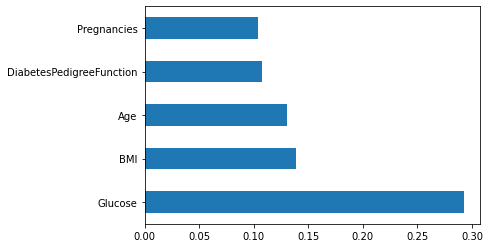

In [19]:
feat_importances = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

The Glucose Is The Most Importent Element

### Splite The Data In Train And Test

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [21]:
X_train.shape

(537, 8)

In [22]:
X_test.shape

(231, 8)

# Train The Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=10,max_features='auto')
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[126  26]
 [ 24  55]]
0.7835497835497836
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       152
           1       0.68      0.70      0.69        79

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



In [26]:
#import pickle
import pickle
pkl_file = open("Diabetes.pkl",'wb')
pickle.dump(classifier,pkl_file)
pkl_file.close()